# Parkinson's Disease Detection with SMOTE

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
    roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

file_path = 'parkinsons/parkinsons.data.csv'  
data = pd.read_csv(file_path)

X = data.drop(columns=['status', 'name'])
y = data['status']

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in sss.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)


In [2]:
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KSVM': SVC(kernel='rbf', probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)  # Default k=5
}

In [3]:
model_results = {}

def evaluate_model(name, model, X_train_scaled, X_test_scaled, y_train_resampled, y_test):
    model.fit(X_train_scaled, y_train_resampled)
    predictions = model.predict(X_test_scaled)
    probabilities = model.predict_proba(X_test_scaled)[:,1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, probabilities)

    # Store the results
    model_results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }

    # Display evaluation metrics
    print(f"\n{name} Model Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC AUC: {roc_auc:.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, predictions))

    # Confusion Matrix
    plt.figure(figsize=(5, 4))
    cm = confusion_matrix(y_test, predictions, normalize='true')
    sns.heatmap(cm * 100, annot=True, fmt=".1f", cmap="Blues", cbar=False)  # Convert to percentage
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, probabilities)
    plt.figure(figsize=(5, 4))
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle="--", color="red")
    plt.title(f"{name} ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()
    print("#############################################################################################")


Random Forest Model Evaluation Metrics:
Accuracy: 0.90
Precision: 0.96
Recall: 0.90
F1 Score: 0.93
ROC AUC: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.96      0.90      0.93        29

    accuracy                           0.90        39
   macro avg       0.86      0.90      0.87        39
weighted avg       0.91      0.90      0.90        39



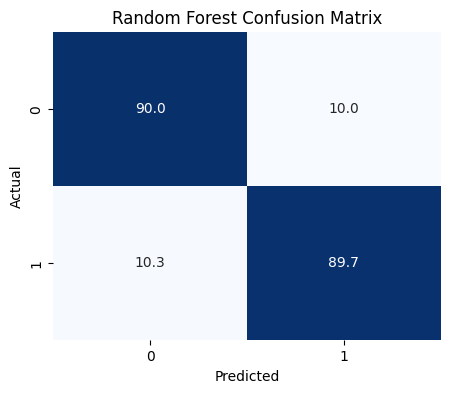

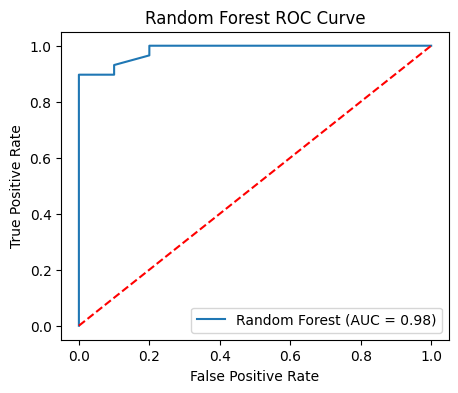

#############################################################################################

Decision Tree Model Evaluation Metrics:
Accuracy: 0.79
Precision: 0.86
Recall: 0.86
F1 Score: 0.86
ROC AUC: 0.73

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.60      0.60        10
           1       0.86      0.86      0.86        29

    accuracy                           0.79        39
   macro avg       0.73      0.73      0.73        39
weighted avg       0.79      0.79      0.79        39



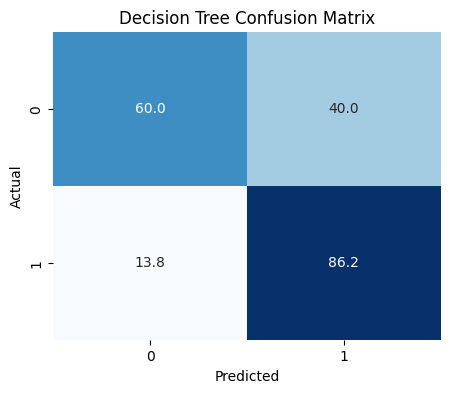

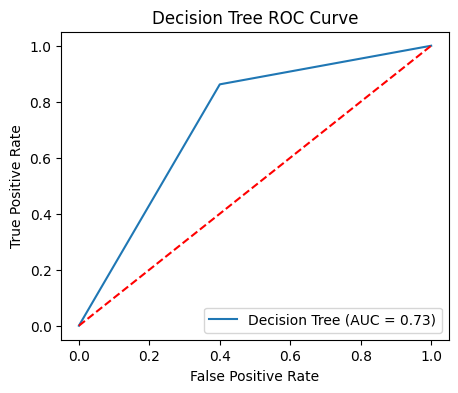

#############################################################################################

KSVM Model Evaluation Metrics:
Accuracy: 0.82
Precision: 0.96
Recall: 0.79
F1 Score: 0.87
ROC AUC: 0.93

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.90      0.72        10
           1       0.96      0.79      0.87        29

    accuracy                           0.82        39
   macro avg       0.78      0.85      0.79        39
weighted avg       0.87      0.82      0.83        39



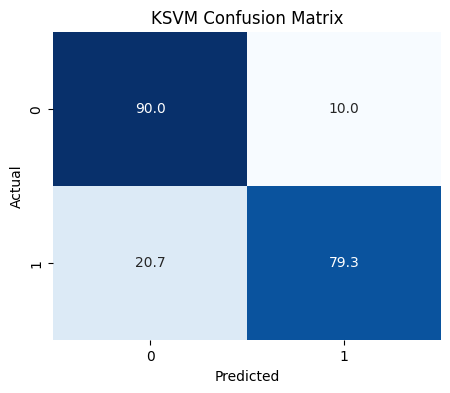

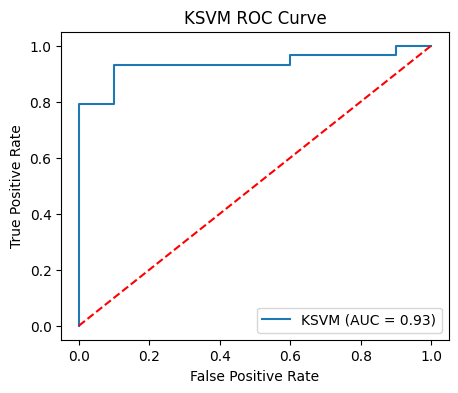

#############################################################################################

KNN Model Evaluation Metrics:
Accuracy: 0.87
Precision: 1.00
Recall: 0.83
F1 Score: 0.91
ROC AUC: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80        10
           1       1.00      0.83      0.91        29

    accuracy                           0.87        39
   macro avg       0.83      0.91      0.85        39
weighted avg       0.91      0.87      0.88        39



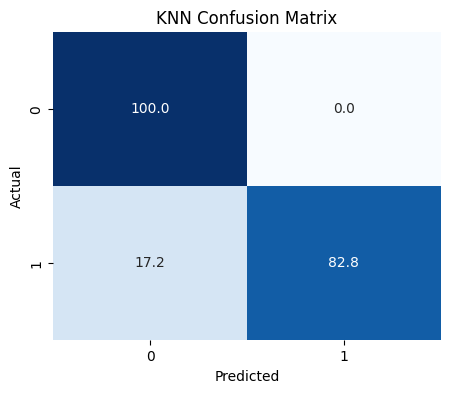

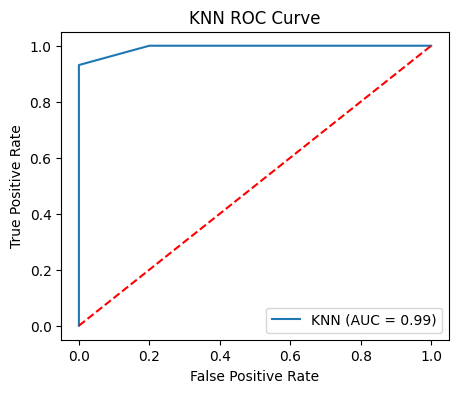

#############################################################################################


In [4]:
for name, model in models.items():
    evaluate_model(name, model, X_train_scaled, X_test_scaled, y_train_resampled, y_test)

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.6920 - loss: 1.7743 - val_accuracy: 0.8125 - val_loss: 1.7198
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8170 - loss: 1.6186 - val_accuracy: 0.8333 - val_loss: 1.5967
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8456 - loss: 1.5408 - val_accuracy: 0.8542 - val_loss: 1.4966
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8697 - loss: 1.4207 - val_accuracy: 0.8542 - val_loss: 1.4141
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8385 - loss: 1.3842 - val_accuracy: 0.8958 - val_loss: 1.3405
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8064 - loss: 1.2989 - val_accuracy: 0.8958 - val_loss: 1.2854
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8541 - loss: 1.2322 - val_accuracy: 0.9167 - val_loss: 1.2220
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8534 - loss: 1.1647 - val_accuracy: 0.9167 - val_loss: 1.1763


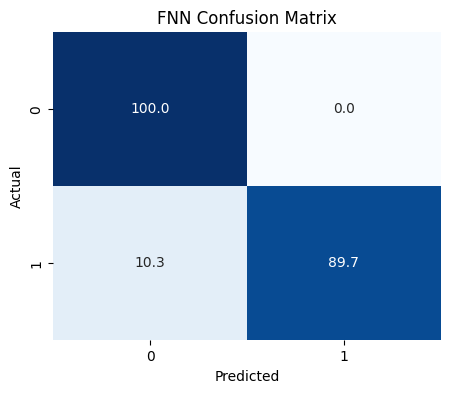

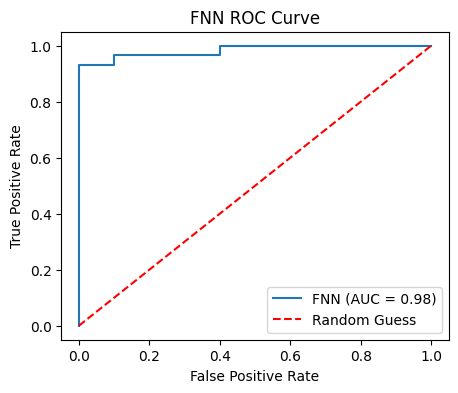

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2



def create_fnn_with_regularization(input_dim):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=input_dim, kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))  # Increased Dropout
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    return model


input_dim = X_train_scaled.shape[1]  
fnn_model = create_fnn_with_regularization(input_dim)


fnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

fnn_model.fit(X_train_scaled, y_train_resampled, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

y_pred_prob_fnn = fnn_model.predict(X_test_scaled).flatten()  # Predicted probabilities
y_pred_fnn = (y_pred_prob_fnn > 0.5).astype(int)  # Convert probabilities to binary predictions

# Evaluate the model
accuracy_fnn = accuracy_score(y_test, y_pred_fnn)
precision_fnn = precision_score(y_test, y_pred_fnn)
recall_fnn = recall_score(y_test, y_pred_fnn)
f1_fnn = f1_score(y_test, y_pred_fnn)
roc_auc_fnn = roc_auc_score(y_test, y_pred_prob_fnn)

model_results["Feed Neural Network"] = {
    'Accuracy': accuracy_fnn,
    'Precision': precision_fnn,
    'Recall': recall_fnn,
    'F1 Score': f1_fnn,
    'ROC AUC': roc_auc_fnn
}

# Print metrics
print("\nFNN Model Evaluation Metrics:")
print(f"Accuracy: {accuracy_fnn:.2f}")
print(f"Precision: {precision_fnn:.2f}")
print(f"Recall: {recall_fnn:.2f}")
print(f"F1 Score: {f1_fnn:.2f}")
print(f"ROC AUC: {roc_auc_fnn:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_fnn))

# Confusion Matrix
name = "FNN"
plt.figure(figsize=(5, 4))
cm = confusion_matrix(y_test, y_pred_fnn, normalize='true')
sns.heatmap(cm * 100, annot=True, fmt=".1f", cmap="Blues", cbar=False)  # Convert to percentage
plt.title(f"{name} Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_fnn)
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, label=f"FNN (AUC = {roc_auc_fnn:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="red", label="Random Guess")
plt.title("FNN ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [6]:
performance_df = pd.DataFrame(model_results).T
print("\nModel Performance Comparison:\n")
print(performance_df)


Model Performance Comparison:

                     Accuracy  Precision    Recall  F1 Score   ROC AUC
Random Forest        0.897436   0.962963  0.896552  0.928571  0.984483
Decision Tree        0.794872   0.862069  0.862069  0.862069  0.731034
KSVM                 0.820513   0.958333  0.793103  0.867925  0.934483
KNN                  0.871795   1.000000  0.827586  0.905660  0.993103
Feed Neural Network  0.923077   1.000000  0.896552  0.945455  0.982759


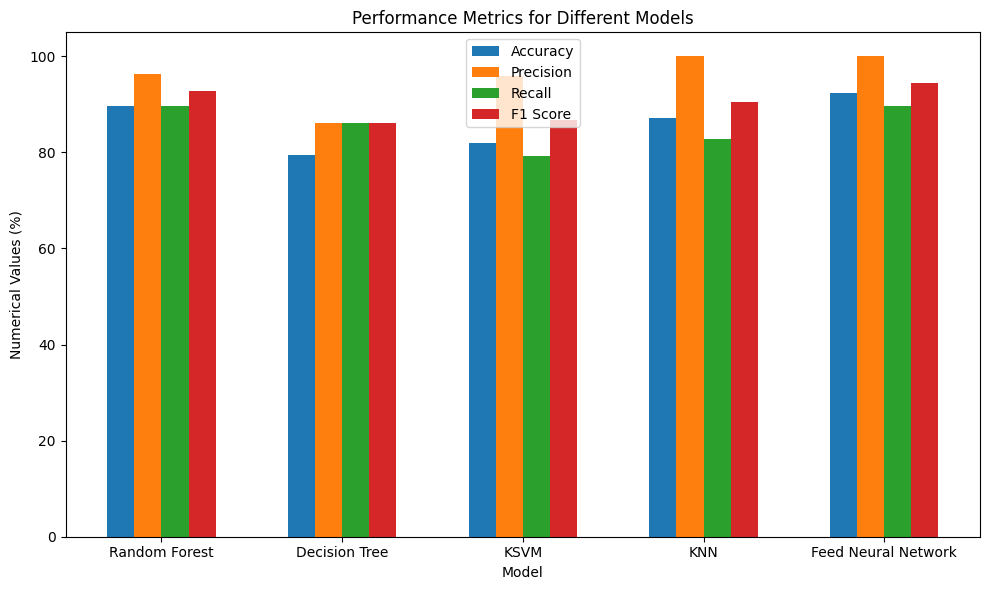

In [8]:
models = list(model_results.keys())
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]

values = {metric: [model_results[model][metric] * 100 for model in models] for metric in metrics}

x = np.arange(len(models))  
width = 0.15  

fig, ax = plt.subplots(figsize=(10, 6))

for i, metric in enumerate(metrics):
    ax.bar(x + i * width, values[metric], width, label=metric)

ax.set_xlabel("Model")
ax.set_ylabel("Numerical Values (%)")
ax.set_title("Performance Metrics for Different Models")
ax.set_xticks(x + width * (len(metrics) - 1) / 2)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()